****


## **Chinelo Osuji**
**Broward College**

[LinkedIn](https://linkedin.com/in/chineloosuji/)

****

****


### **Augmented Dickey-Fuller Test**


$ \Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \sum_{i=1}^{p} \phi_i \Delta y_{t-i} + \epsilon_t $

where:  
$\Delta y_t$ is the difference of the time series $y$ at time $t$, representing the change in the value of $y$ from one time period to the next. This is often used to transform a time series into a stationary series, where $\Delta y_t = y_t - y_{t-1}$.  
$\alpha$ is the constant term in the regression model, capturing the intercept of the relationship. It represents the value of the dependent variable when all other explanatory variables are zero.  
$\beta t$ is the coefficient for a time trend, which accounts for any systematic linear trend in the time series over time. Here, $t$ represents time, and $\beta$ measures the rate of change or slope of this trend component.  
$\gamma$ is the coefficient for the lagged value of $y$, indicating the impact of the previous period's value of $y$ on the current period's value.  
$p$ is the number of lagged differences included in the model. This parameter defines the extent to which past values of the time series (in their differenced form) are used to predict the current value.  
$\phi_i$ is the coefficient for the $i$th lagged difference in the series. Each $\phi_i$ measures the impact of the $i$th lagged change in $y$ on the current change in $y$.  
$\epsilon_t$ is the error term at time $t$, representing the random fluctuation or the part of $\Delta y_t$ that is not explained by the model. It captures the unpredicted or unexplained variation in the dependent variable.




****

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(CPI['Consumer_Price_Index'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.902094
p-value                   0.787282
# lags used               1.000000
# observations          553.000000
critical value (1%)      -3.442230
critical value (5%)      -2.866781
critical value (10%)     -2.569561
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


****

### **Augmented Dickey-Fuller Test results show that the data is Non-Stationary.**

****

****

**Stationarity is a necessary prerequisite for ARIMA modeling**

**Stationarity means that the properties of the series (mean, variance, autocorrelation) remain constant over time.**

### **We can perform a First Order Difference Transformation to Achieve Stationarity**

$
\Delta Y_t = Y_t - Y_{t-1}
$

$
\text{where:} \\
\Delta Y_t \text{ is the first-order differenced value at time } t, \text{ representing the change in the time series value from one time point to the next.}
$
$
\text{This differencing process helps in stabilizing the mean of a time series by removing changes at a specific lag.}
$
$
Y_t \text{ is the original series value at time } t, \text{ indicating the actual observed value of the time series at a specific time point } t. \\
Y_{t-1} \text{ is the original series value at one time period prior to } t, \text{ representing the observed value of the series at time } t-1.
$



****

In [ ]:
from statsmodels.tsa.statespace.tools import diff
CPI['CPI_DIFF_1'] = diff(CPI['Consumer_Price_Index'],k_diff=1).fillna(0)

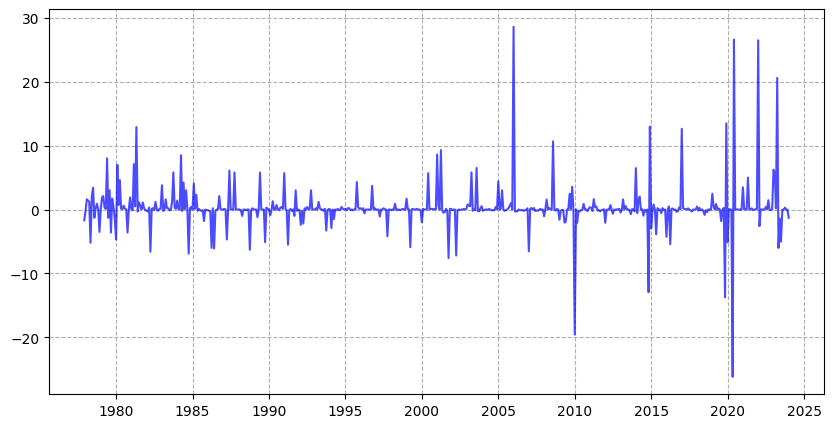

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(CPI['CPI_DIFF_1'], color='blue', alpha=0.7)
plt.grid(True, linestyle='--')

In [ ]:
adf_test(CPI['CPI_DIFF_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -28.860134
p-value                   0.000000
# lags used               0.000000
# observations          553.000000
critical value (1%)      -3.442230
critical value (5%)      -2.866781
critical value (10%)     -2.569561
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


****

**The test statistic is far more negative than the critical values at all used significance levels. This shows that the null hypothesis can be rejected.**

**A p-value of 0 also shows that the null hypothesis can be rejected.**



****

In [ ]:
CPI['CPI_DIFF_1'].isna().sum()

1

In [ ]:
CPI['CPI_DIFF_1'] = CPI['CPI_DIFF_1'].fillna(0)

In [ ]:
CPI['CPI_DIFF_1'].isna().sum()

0

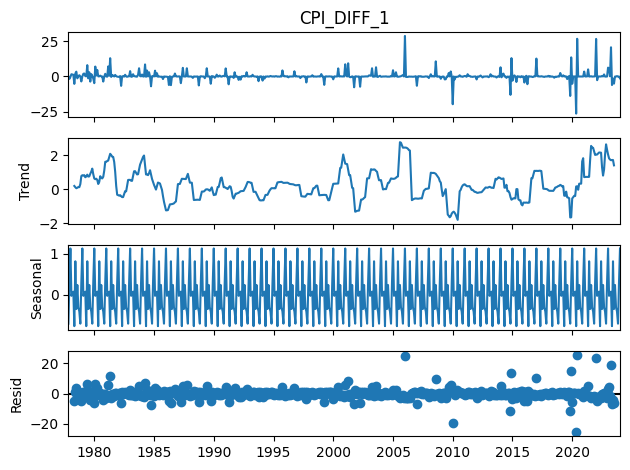

In [ ]:
result = seasonal_decompose(CPI['CPI_DIFF_1'], model='add')
result.plot();